In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

from datetime import date

In [2]:
pd.__version__,np.__version__, matplotlib.__version__

('1.3.2', '1.21.2', '3.4.3')

In [3]:
df = pd.DataFrame({
    'name':[
        'john','mary','peter','jeff','bill'
    ],
    'date_of_birth':[
        '2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25', '1992-06-30',
    ],
})
df

,name,date_of_birth
0,john,2000-01-01
1,mary,1999-12-20
2,peter,2000-11-01
3,jeff,1995-02-25
4,bill,1992-06-30


In [4]:
df.index

RangeIndex(start=0, stop=5, step=1)

## use date column as index

In [5]:
datetime_series = pd.to_datetime(df['date_of_birth'])

datetime_index = pd.DatetimeIndex(datetime_series.values)

df2=df.set_index(datetime_index)

df2.drop('date_of_birth',axis=1,inplace=True)

df2

,name
2000-01-01,john
1999-12-20,mary
2000-11-01,peter
1995-02-25,jeff
1992-06-30,bill


In [6]:
df2.index

DatetimeIndex(['2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25',
               '1992-06-30'],
              dtype='datetime64[ns]', freq=None)

## fill empty periods

In [22]:
df = pd.DataFrame({
    'name':[
        'john','mary','peter','jeff','bill'
    ],
    'day_born':[
        '1988-12-28', '1988-12-25', '1988-12-24', '1988-12-26',  '1988-12-30'
    ],
})
df

,name,day_born
0,john,1988-12-28
1,mary,1988-12-25
2,peter,1988-12-24
3,jeff,1988-12-26
4,bill,1988-12-30


In [23]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [25]:
datetime_series = pd.to_datetime(df['day_born'])

datetime_index = pd.DatetimeIndex(datetime_series.values)

df3=df.set_index(datetime_index)

df3.drop('day_born',axis=1,inplace=True)

df3.sort_index(inplace=True)

df3

,name
1988-12-24,peter
1988-12-25,mary
1988-12-26,jeff
1988-12-28,john
1988-12-30,bill


In [26]:
df3.index

DatetimeIndex(['1988-12-24', '1988-12-25', '1988-12-26', '1988-12-28',
               '1988-12-30'],
              dtype='datetime64[ns]', freq=None)

In [28]:
df4=df3.asfreq('D')
df4

,name
1988-12-24,peter
1988-12-25,mary
1988-12-26,jeff
1988-12-27,NaN
1988-12-28,john
1988-12-29,NaN
1988-12-30,bill


In [29]:
df4.index

DatetimeIndex(['1988-12-24', '1988-12-25', '1988-12-26', '1988-12-27',
               '1988-12-28', '1988-12-29', '1988-12-30'],
              dtype='datetime64[ns]', freq='D')

## lag columns

In [13]:
df = pd.DataFrame(
    data={'reading': np.random.uniform(high=100,size=10)},
    index=pd.to_datetime([date(2019,1,d) for d in range(1,11)])
)
df

,reading
2019-01-01,31.474293
2019-01-02,18.360855
2019-01-03,45.865392
2019-01-04,13.293545
2019-01-05,10.255298
2019-01-06,53.480229
2019-01-07,34.337437
2019-01-08,16.192655
2019-01-09,68.528084
2019-01-10,99.677619


In [14]:
df['reading_d_minus_1']=df['reading'].shift(1,freq='D')

df['reading_d_minus_2']=df['reading'].shift(2,freq='D')

In [15]:
df

,reading,reading_d_minus_1,reading_d_minus_2
2019-01-01,31.474293,NaN,NaN
2019-01-02,18.360855,31.474293,NaN
2019-01-03,45.865392,18.360855,31.474293
2019-01-04,13.293545,45.865392,18.360855
2019-01-05,10.255298,13.293545,45.865392
2019-01-06,53.480229,10.255298,13.293545
2019-01-07,34.337437,53.480229,10.255298
2019-01-08,16.192655,34.337437,53.480229
2019-01-09,68.528084,16.192655,34.337437
2019-01-10,99.677619,68.528084,16.192655


## plot counts by day

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


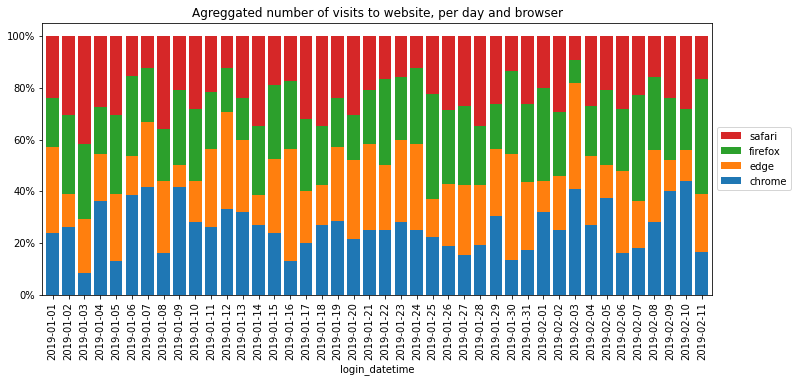

In [16]:
from datetime import date,datetime,timedelta

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

np.random.seed(42)

# create a dummy dataset
df = pd.DataFrame(
    index=pd.to_datetime(
        [datetime(2019,1,1)+timedelta(hours=h+10*np.random.uniform()) for h in range(0,1000)]
    ),
    data={
        'browser': np.random.choice([
            'chrome',
            'firefox',
            'safari',
            'edge'
        ],size=1000,replace=True)
    },
    
)

print(type(df.index))
# 'pandas.core.indexes.datetimes.DatetimeIndex'

# just to make it more intuitive
df.index.name= 'login_datetime'

df.groupby(by=[lambda dt: dt.strftime('%Y-%m-%d'),'browser']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,legend='reverse',width=0.8)

current_handles, current_labels = plt.gca().get_legend_handles_labels()

# sort or reorder the labels and handles
reversed_handles = list(reversed(current_handles))
reversed_labels = list(reversed(current_labels))

# call plt.legend() with the new values
plt.legend(reversed_handles,reversed_labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gcf().set_size_inches(12,5)
plt.title('Agreggated number of visits to website, per day and browser')
plt.show()